In [233]:
# import packages for analysis and modeling
import pandas as pd  # data frame operations
#from pandas.tools.plotting import scatter_matrix  # scatter plot matrix
from pandas import Series
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
from sklearn.tree import DecisionTreeRegressor  # machine learning tree
from sklearn.ensemble import RandomForestRegressor # ensemble method
from matplotlib import pyplot
from pprint import pprint
import zipcodes
#import pyzipcode

from matplotlib import pyplot
import matplotlib.pyplot as plt  # 2D plotting

# time series
#AK: Hot Srings, Litle Rock, Fayetteville, Searcy

In [138]:
house = pd.read_csv('clean_house_data.csv', encoding = "ISO-8859-1")

house.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,337200.0,338200.0,339000.0,...,1047600,1049400,1048800,1049900,1054300,1059400,1067800,1080400,1082300,1072200
1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,210400.0,212200.0,212200.0,...,338100,336700,336100,336200,335500,334200,333500,333500,333400,332300
2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,502900.0,504900.0,506300.0,...,1319100,1317900,1319800,1324200,1330000,1336400,1342000,1347400,1345200,1334500
3,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,95400.0,95600.0,95800.0,...,178500,179400,180300,181100,182100,183300,183000,181800,181800,182800
4,93144,79936,El Paso,TX,El Paso,El Paso County,5,77300.0,77300.0,77300.0,...,125700,126400,126900,127600,128200,128600,128900,128700,128500,128800


In [157]:
#foo = df.loc[df['column']==value]
#test = house.loc[house.City == 'Hot Springs']
# foo = df.loc[(df['column1']==value) | (df['columns2'] == 'b') | (df['column3'] == 'c')]
 

ar = house.loc[house.State == 'AR']
ar_time = ar.loc[(ar.City == 'Hot Springs') | (ar.City == 'Little Rock') | 
                   (ar.City == 'Fayetteville') | (ar.City == 'Searcy') ]

ar_time.shape



(14, 286)

In [158]:
ar_time.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
283,89249,71913,Hot Springs,AR,Hot Springs,Garland County,294,80900.0,80900.0,80800.0,...,146800,146900,147700,149000,150500,151300,151700,152000,151500,150300
770,89707,72701,Fayetteville,AR,Fayetteville-Springdale-Rogers,Washington County,796,83100.0,83500.0,83700.0,...,220700,223100,225200,227300,228800,229600,229700,229900,231800,234200
1512,89709,72703,Fayetteville,AR,Fayetteville-Springdale-Rogers,Washington County,1557,104900.0,105300.0,105600.0,...,233000,233800,235600,237700,239700,241000,241000,240800,241800,242900
2195,89409,72143,Searcy,AR,Searcy,White County,2271,73800.0,74100.0,74300.0,...,125000,126500,128500,129900,130600,131100,132400,133300,133200,132800
2346,89442,72204,Little Rock,AR,Little Rock-North Little Rock-Conway,Pulaski County,2427,39000.0,39300.0,39500.0,...,69500,69400,69900,70400,70300,69700,69500,69000,68300,67700


In [186]:
# df.drop(df.columns[[1, 2]], axis=1, inplace=True)
# test = ar_time.iloc[ : ,0:6]
#t = ar_time.columns[7:16]
# ar_time.loc[:,t]

ar_analysis = ar_time.drop(ar_time.loc[:,ar_time.columns[7:16]], axis = 1)
ar_analysis.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1997-01,1997-02,1997-03,...,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
283,89249,71913,Hot Springs,AR,Hot Springs,Garland County,294,79300.0,79100.0,78900.0,...,146800,146900,147700,149000,150500,151300,151700,152000,151500,150300
770,89707,72701,Fayetteville,AR,Fayetteville-Springdale-Rogers,Washington County,796,83800.0,84400.0,85000.0,...,220700,223100,225200,227300,228800,229600,229700,229900,231800,234200
1512,89709,72703,Fayetteville,AR,Fayetteville-Springdale-Rogers,Washington County,1557,107100.0,107500.0,107800.0,...,233000,233800,235600,237700,239700,241000,241000,240800,241800,242900
2195,89409,72143,Searcy,AR,Searcy,White County,2271,76400.0,76700.0,77000.0,...,125000,126500,128500,129900,130600,131100,132400,133300,133200,132800
2346,89442,72204,Little Rock,AR,Little Rock-North Little Rock-Conway,Pulaski County,2427,40900.0,41100.0,41300.0,...,69500,69400,69900,70400,70300,69700,69500,69000,68300,67700


In [195]:
#pd.melt(df, id_vars=['A'], value_vars=['B'])
cols = ar_analysis.columns[7:]
ar_city = pd.melt(ar_analysis, id_vars=['City'],value_vars=cols)
ar_metro = pd.melt(ar_analysis, id_vars=['Metro'],value_vars=cols)

ar_city.head()

,City,variable,value
0,Hot Springs,1997-01,79300.0
1,Fayetteville,1997-01,83800.0
2,Fayetteville,1997-01,107100.0
3,Searcy,1997-01,76400.0
4,Little Rock,1997-01,40900.0


In [210]:
#pd.to_datetime(df)

ar_city.variable = pd.to_datetime(ar_city.variable)
ar_metro.variable = pd.to_datetime(ar_metro.variable)

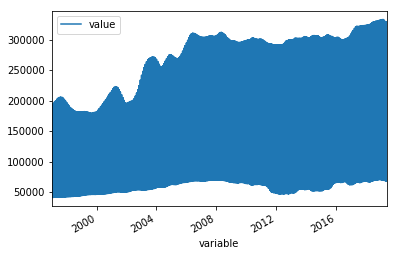

In [206]:
ar_city.plot(x='variable', y='value')

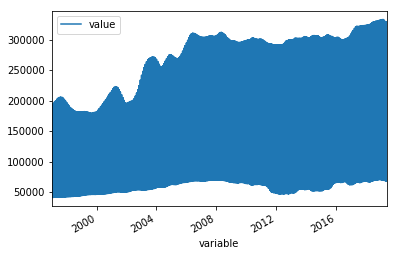

In [211]:
ar_metro.plot(x='variable', y='value')

In [251]:
ar_time = ar.loc[(ar.City == 'Hot Springs') | (ar.City == 'Little Rock') | 
                   (ar.City == 'Fayetteville') | (ar.City == 'Searcy') ]

ar_fayet = ar_city.loc[ar_city.City=='Fayetteville']
ar_htsprng = ar_city.loc[ar_city.City=='Hot Springs']
ar_ltl_r = ar_city.loc[ar_city.City=='Little Rock']
ar_srcy = ar_city.loc[ar_city.City=='Searcy']

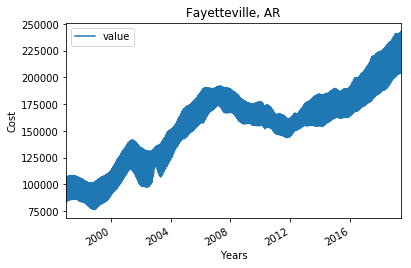

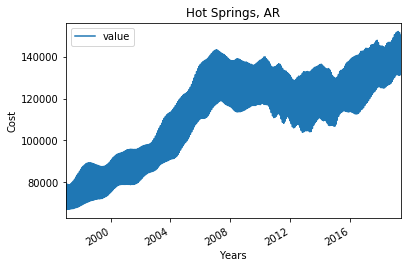

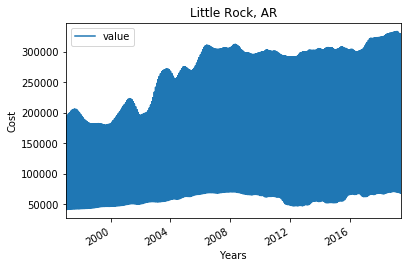

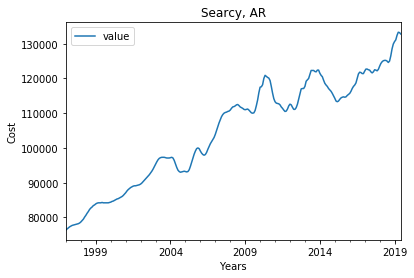

In [252]:
ar_fayet.plot(x='variable', y='value').set(xlabel='Years', ylabel='Cost',title='Fayetteville, AR')
pyplot.show()

ar_htsprng.plot(x='variable', y='value').set(xlabel='Years', ylabel='Cost',title='Hot Springs, AR')
pyplot.show()

ar_ltl_r.plot(x='variable', y='value').set(xlabel='Years', ylabel='Cost',title='Little Rock, AR')
pyplot.show()

ar_srcy.plot(x='variable', y='value').set(xlabel='Years', ylabel='Cost',title='Searcy, AR')
pyplot.show()


In [228]:
# df.groupby('A').mean()
# City	variable	value

lttlRck = ar_ltl_r.groupby(['City', 'variable']).mean()
fVille = ar_fayet.groupby(['City', 'variable']).mean()
hotSrngs = ar_htsprng.groupby(['City', 'variable']).mean()
srcy = ar_srcy.groupby(['City', 'variable']).mean()

<Figure size 1440x720 with 0 Axes>

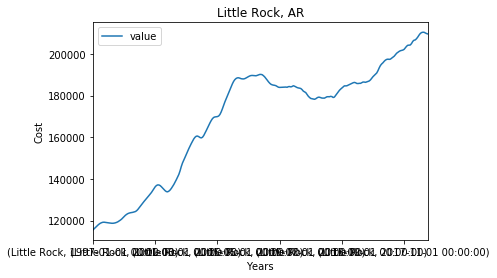

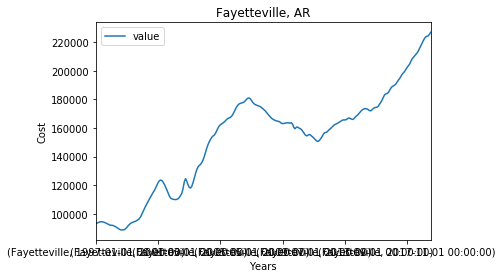

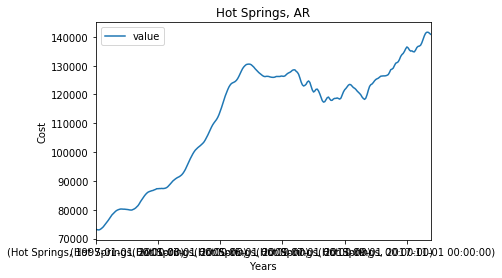

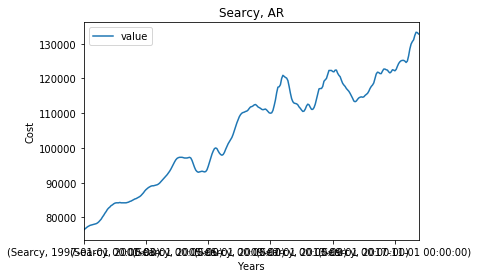

In [237]:
plt.figure(figsize=(20,10))
lttlRck.plot().set(xlabel='Years', ylabel='Cost',title='Little Rock, AR')
pyplot.show()
#plt.savefig('boxplot.png')

fVille.plot().set(xlabel='Years', ylabel='Cost',title='Fayetteville, AR')
pyplot.show()

hotSrngs.plot().set(xlabel='Years', ylabel='Cost',title='Hot Springs, AR')
pyplot.show()

srcy.plot().set(xlabel='Years', ylabel='Cost',title='Searcy, AR')
pyplot.show()

Hot Springs


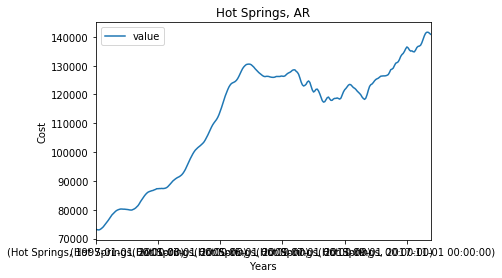

Fayetteville-Springdale-Rogers


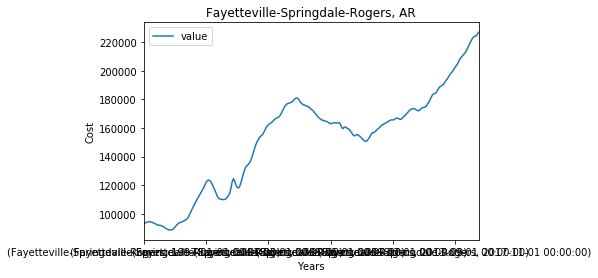

Searcy


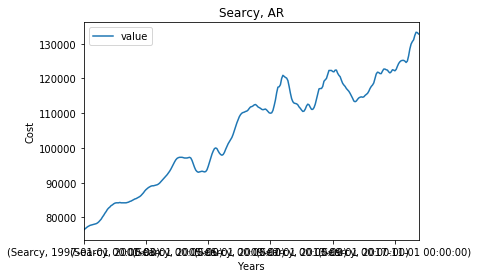

Little Rock-North Little Rock-Conway


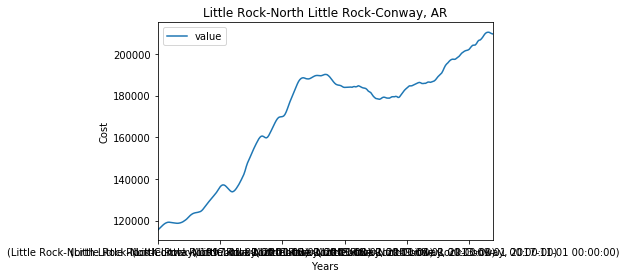

In [253]:
# by metro
# df.name.unique()
# ar_metro.Metro.unique()

for i in ar_metro.Metro.unique():
    print(i)
    ar_metro.loc[ar_metro.Metro==i].groupby(['Metro', 'variable']).mean().plot().set(xlabel='Years', ylabel='Cost',title=i + ', AR')
    pyplot.show()